In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from rdkit.Chem import PandasTools

In [4]:
# Canonical smiles
smiles_dict = {
    "MK-5046": "FC(C(c1ccc(cc1)n1cccn1)(Cc1ncc([nH]1)CC1(CC1)C(F)(F)F)O)(F)F", 
    "ML-18": "COc1ccc(cc1)C1(CCCCC1)CNC(=O)C(Cc1c[nH]c2c1cccc2)NC(=O)Nc1ccc(cc1)[N+](=O)[O-]",
    "bantag-1": "CC(CC(C(=O)NCC1=CCCC(=C1)C[N+](C)(C)C)NC(=O)CC(C(NC(C(N(C(=O)C(CC1=CC=CCC1)NC(=O)OC(C)(C)C)C)Cc1c[nH]c[nH+]1)O)CC1CCCCC1)O)C", 
    # TODO: peptide? convert to SMILES
}

MK-5046
FC(C(c1ccc(cc1)n1cccn1)(Cc1ncc([nH]1)CC1(CC1)C(F)(F)F)O)(F)F


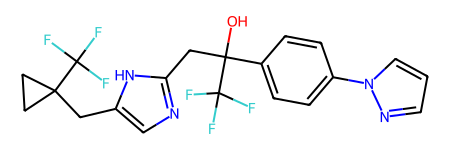

ML-18
COc1ccc(cc1)C1(CCCCC1)CNC(=O)C(Cc1c[nH]c2c1cccc2)NC(=O)Nc1ccc(cc1)[N+](=O)[O-]


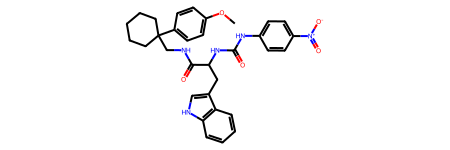

bantag-1
CC(CC(C(=O)NCC1=CCCC(=C1)C[N+](C)(C)C)NC(=O)CC(C(NC(C(N(C(=O)C(CC1=CC=CCC1)NC(=O)OC(C)(C)C)C)Cc1c[nH]c[nH+]1)O)CC1CCCCC1)O)C


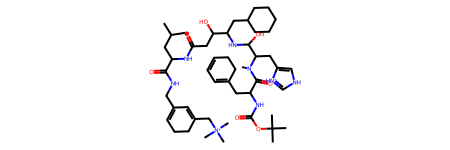

In [6]:
# Draw 
from rdkit import Chem
for name, smiles in smiles_dict.items():
    m = Chem.MolFromSmiles(smiles)
    print(name)
    print(smiles)
    display(m)
    

In [7]:
# Save to SDF for each 
for name, smiles in smiles_dict.items():
    m = Chem.MolFromSmiles(smiles)
    w = Chem.SDWriter(f"{name}.sdf")
    w.write(m)
    w.close()

### Convert to 3D (relaxed)

In [8]:
from rdkit.Chem import AllChem

for name, smiles in smiles_dict.items():
    mol = Chem.MolFromSmiles(smiles)
    hmol = Chem.AddHs(mol)

    AllChem.EmbedMolecule(hmol, AllChem.ETKDG())    

    print(AllChem.UFFOptimizeMolecule(hmol))
    w = Chem.SDWriter(f"{name}_minimised.sdf")
    w.write(hmol)

w.close()


1
1
1
